# Lab 1 Analysis Example using Thicket

In [25]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

What are the files we are analyzing?

In [26]:
all_files = glob("/home/crnicholls20/project/MPI/cali/*.cali")
print(all_files)

['/home/crnicholls20/project/MPI/cali/p129-a4194304-da.cali', '/home/crnicholls20/project/MPI/cali/p129-a268435456-da.cali']


# Read MPI

In [27]:
tk1 = th.Thicket.from_caliperreader(all_files)

What file?

In [28]:
tk1.profile_mapping

OrderedDict([(123072395,
              '/home/crnicholls20/project/MPI/cali/p129-a268435456-da.cali'),
             (2361325633,
              '/home/crnicholls20/project/MPI/cali/p129-a4194304-da.cali')])

Call tree

In [29]:
tk1.statsframe.dataframe["test"] = -1
print(tk1.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

-1.000 main
├─ -1.000 comm
│  ├─ -1.000 comm_large
│  │  ├─ -1.000 MPI_Recv
│  │  └─ -1.000 MPI_Send
│  └─ -1.000 comm_small
│     ├─ -1.000 MPI_Recv
│     └─ -1.000 MPI_Send
├─ -1.000 comp
│  └─ -1.000 comp_large
├─ -1.000 correctness_check
└─ -1.000 data_init

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Performance data

In [30]:
tk1.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              123072395     1   
                                                  2361325633    1   
{'name': 'comm', 'type': 'function'}              123072395     3   
                                                  2361325633    3   
{'name': 'comm_large', 'type': 'function'}        123072395     6   
                                                  2361325633    6   
{'name': 'MPI_Recv', 'type': 'function'}          123072395     8   
                                                  2361325633    8   
{'name': 'MPI_Send', 'type': 'function'}          123072395     7   
                                                  2361325633    7   
{'name': 'comm_small', 'type': 'function'}        123072395     4   
                                                  2361325633    4   
{'name': 'MPI_Recv', 'type': 'function'}          123072395    10   
                                                  2361325633   10   
{'name': 'MPI_Send', 'type': 'function'}          123072395     5   
                                                  2361325633    5   
{'name': 'comp', 'type': 'function'}              123072395    11   
                                                  2361325633   11   
{'name': 'comp_large', 'type': 'function'}        123072395    12   
                                                  2361325633   12   
{'name': 'correctness_check', 'type': 'function'} 123072395     9   
                                                  2361325633    9   
{'name': 'data_init', 'type': 'function'}         123072395     2   
                                                  2361325633    2   

                                                               spot.channel  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              123072395   regionprofile   
                                                  2361325633  regionprofile   
{'name': 'comm', 'type': 'function'}              123072395   regionprofile   
                                                  2361325633  regionprofile   
{'name': 'comm_large', 'type': 'function'}        123072395   regionprofile   
                                                  2361325633  regionprofile   
{'name': 'MPI_Recv', 'type': 'function'}          123072395   regionprofile   
                                                  2361325633  regionprofile   
{'name': 'MPI_Send', 'type': 'function'}          123072395   regionprofile   
                                                  2361325633  regionprofile   
{'name': 'comm_small', 'type': 'function'}        123072395   regionprofile   
                                                  2361325633  regionprofile   
{'name': 'MPI_Recv', 'type': 'function'}          123072395   regionprofile   
                                                  2361325633  regionprofile   
{'name': 'MPI_Send', 'type': 'function'}          123072395   regionprofile   
                                                  2361325633  regionprofile   
{'name': 'comp', 'type': 'function'}              123072395   regionprofile   
                                                  2361325633  regionprofile   
{'name': 'comp_large', 'type': 'function'}        123072395   regionprofile   
                                                  2361325633  regionprofile   
{'name': 'correctness_check', 'type': 'function'} 123072395   regionprofile   
                                                  2361325633  regionprofile   
{'name': 'data_init', 'type': 'function'}         123072395   regionprofile   
                                                  2361325633  regionprofile   

                                                              Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              1230

Metadata

In [31]:
tk1.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
123072395,2.11.0-dev,129,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p129-a268435456-da.cali,true,1700102439,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_mpi, 268435456, a]",c,MergeSort,MPI,Double,8,268435456,Random,129,128,0,25,Handwritten
2361325633,2.11.0-dev,129,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p129-a4194304-da.cali,true,1700093281,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_mpi, 4194304, a]",c,MergeSort,MPI,Double,8,4194304,Random,129,128,0,25,Handwritten


# Goal

programmatically analyze the data by graphing it

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [32]:
tk1.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
123072395,2.11.0-dev,129,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p129-a268435456-da.cali,true,1700102439,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_mpi, 268435456, a]",c,MergeSort,MPI,Double,8,268435456,Random,129,128,0,25,Handwritten
2361325633,2.11.0-dev,129,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p129-a4194304-da.cali,true,1700093281,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_mpi, 4194304, a]",c,MergeSort,MPI,Double,8,4194304,Random,129,128,0,25,Handwritten


In [83]:
gb = tk1.groupby("num_procs")

1  thickets created...
{129: <thicket.thicket.Thicket object at 0x2b47d9059730>}


Compose these 3 groups column-wise to get a holistic view of the data

In [84]:
    ctk = th.Thicket.concat_thickets(
        thickets=list(gb.values()),
        headers=list(gb.keys()),
        axis="columns",
        metadata_key="InputSize"
    )

In [85]:
ctk.dataframe

129  \
                                                            nid   
node                                              InputSize       
{'name': 'main', 'type': 'function'}              4194304     1   
                                                  268435456   1   
{'name': 'comm', 'type': 'function'}              4194304     3   
                                                  268435456   3   
{'name': 'comm_large', 'type': 'function'}        4194304     6   
                                                  268435456   6   
{'name': 'MPI_Recv', 'type': 'function'}          4194304     8   
                                                  268435456   8   
{'name': 'MPI_Send', 'type': 'function'}          4194304     7   
                                                  268435456   7   
{'name': 'comm_small', 'type': 'function'}        4194304     4   
                                                  268435456   4   
{'name': 'MPI_Recv', 'type': 'function'}          4194304    10   
                                                  268435456  10   
{'name': 'MPI_Send', 'type': 'function'}          4194304     5   
                                                  268435456   5   
{'name': 'comp', 'type': 'function'}              4194304    11   
                                                  268435456  11   
{'name': 'comp_large', 'type': 'function'}        4194304    12   
                                                  268435456  12   
{'name': 'correctness_check', 'type': 'function'} 4194304     9   
                                                  268435456   9   
{'name': 'data_init', 'type': 'function'}         4194304     2   
                                                  268435456   2   

                                                                            \
                                                              spot.channel   
node                                              InputSize                  
{'name': 'main', 'type': 'function'}              4194304    regionprofile   
                                                  268435456  regionprofile   
{'name': 'comm', 'type': 'function'}              4194304    regionprofile   
                                                  268435456  regionprofile   
{'name': 'comm_large', 'type': 'function'}        4194304    regionprofile   
                                                  268435456  regionprofile   
{'name': 'MPI_Recv', 'type': 'function'}          4194304    regionprofile   
                                                  268435456  regionprofile   
{'name': 'MPI_Send', 'type': 'function'}          4194304    regionprofile   
                                                  268435456  regionprofile   
{'name': 'comm_small', 'type': 'function'}        4194304    regionprofile   
                                                  268435456  regionprofile   
{'name': 'MPI_Recv', 'type': 'function'}          4194304    regionprofile   
                                                  268435456  regionprofile   
{'name': 'MPI_Send', 'type': 'function'}          4194304    regionprofile   
                                                  268435456  regionprofile   
{'name': 'comp', 'type': 'function'}              4194304    regionprofile   
                                                  268435456  regionprofile   
{'name': 'comp_large', 'type': 'function'}        4194304    regionprofile   
                                                  268435456  regionprofile   
{'name': 'correctness_check', 'type': 'function'} 4194304    regionprofile   
                                                  268435456  regionprofile   
{'name': 'data_init', 'type': 'function'}         4194304    regionprofile   
                                                  268435456  regionprofile   

                                                                           \
                                                            Min ti

Perform pandas operations to get the table in a desirable format for plotting

In [86]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node",""),(129, "nid"),(129, "spot.channel")], axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [87]:
ctk.dataframe

129                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              4194304       35.961238     56.373427     37.477993   
                  268435456   1012.918310   2164.173232   1079.944479   
comm              4194304       14.208726     20.174128     15.967106   
                  268435456    919.924955   1143.499098    957.742168   
comm_large        4194304        0.000609     20.169916      0.330818   
                  268435456      1.354311   1142.921868     16.091433   
MPI_Recv          4194304        0.000508     17.848746      0.223680   
                  268435456      0.513492   1084.075790     13.171161   
MPI_Send          4194304        0.000068      2.320066      0.107386   
                  268435456      0.257383     58.842521      2.931208   
comm_small        4194304        0.002794     17.638467     15.636221   
                  268435456      0.003531    982.224097    941.642091   
MPI_Recv          4194304       14.078379     17.638233     15.745759   
                  268435456    917.555086    982.223873    948.975672   
MPI_Send          4194304        0.000044      0.568958      0.008376   
                  268435456      0.000040      0.495823      0.017095   
comp              4194304        0.428109     13.483016      0.949332   
                  268435456     70.708899    886.130722     94.131740   
comp_large        4194304        0.428074     13.482821      0.936845   
                  268435456     70.708865    885.631838     94.118984   
correctness_check 4194304        1.515466      1.515466      1.515466   
                  268435456     83.690113     83.690113     83.690113   
data_init         4194304       14.363438     14.363438     14.363438   
                  268435456    916.014433    916.014433    916.014433   

                                                               
                                Total time Variance time/rank  
name              InputSize                                    
main              4194304      4834.661155           6.249790  
                  268435456  139312.837755       20039.782311  
comm              4194304      2059.756614           0.902315  
                  268435456  123548.739657         927.342768  
comm_large        4194304        42.675534           3.201162  
                  268435456    2075.794793       10149.621201  
MPI_Recv          4194304        28.854693           2.492128  
                  268435456    1699.079808        9116.674764  
MPI_Send          4194304        13.745423           0.076452  
                  268435456     375.194638          42.405263  
comm_small        4194304      2017.072520           2.450131  
                  268435456  121471.829770        7221.948370  
MPI_Recv          4194304      2015.457201           0.556202  
                  268435456  121468.885988         297.286589  
MPI_Send          4194304         1.072128           0.004373  
                  268435456       2.188137           0.007173  
comp              4194304       121.514542           1.758246  
                  268435456   12048.862736        7102.029671  
comp_large        4194304       119.916212           1.759139  
                  268435456   12047.229946        7096.139061  
correctness_check 4194304         1.515466           0.000000  
                  268435456      83.690113           0.000000  
data_init         4194304        14.363438           0.000000  
                  268435456     916.014433           0.000000

In [88]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("InputSize"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [93]:
print(matrix_sizes)

[(129, 'Avg time/rank'), (129, 'Max time/rank'), (129, 'Min time/rank'), (129, 'Total time'), (129, 'Variance time/rank')]


# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [89]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

In [90]:
ctk.dataframe.loc["main"]

129                                             \
          Min time/rank Max time/rank Avg time/rank     Total time   
InputSize                                                            
4194304       35.961238     56.373427     37.477993    4834.661155   
268435456   1012.918310   2164.173232   1079.944479  139312.837755   

                              
          Variance time/rank  
InputSize                     
4194304             6.249790  
268435456       20039.782311

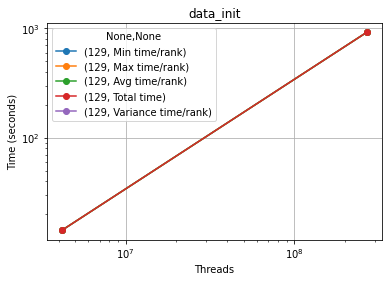

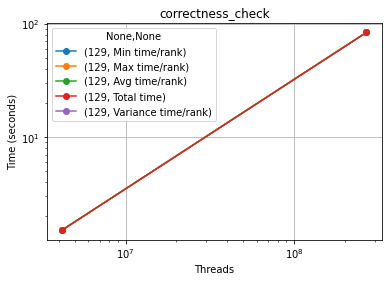

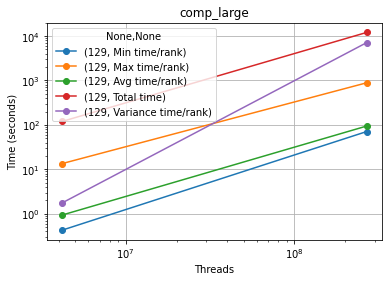

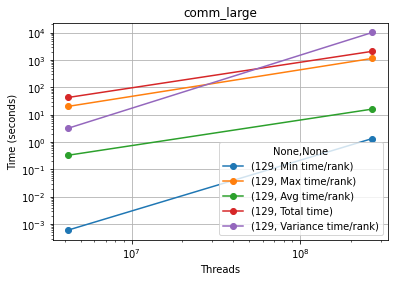

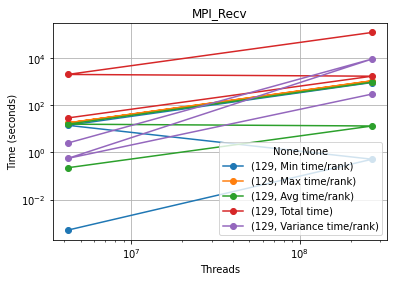

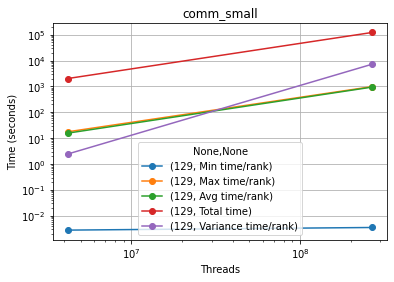

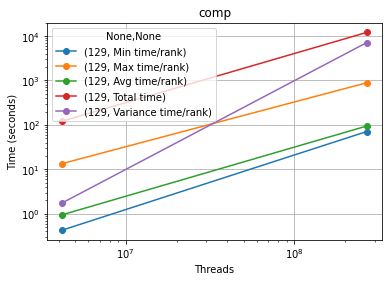

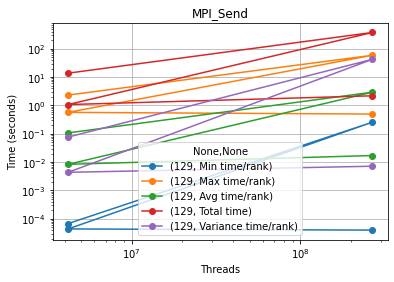

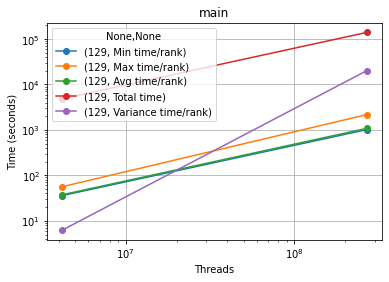

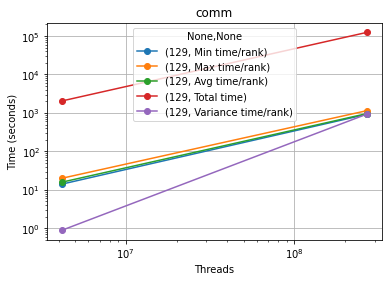

In [91]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

## Speedup

In [44]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

KeyError: 1

In [45]:
all_files_2 = glob("/home/crnicholls20/project/CUDA/*.cali")
print(all_files_2)

['/home/crnicholls20/project/CUDA/t8-v256-dr.cali', '/home/crnicholls20/project/CUDA/t8-v128-dr.cali']


In [46]:
tk2 = th.Thicket.from_caliperreader(all_files_2)

In [48]:
tk2.statsframe.dataframe["test"] = -1
print(tk2.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

-1.000 main
├─ -1.000 comm
│  └─ -1.000 comm_large
├─ -1.000 comp
│  └─ -1.000 comp_large
├─ -1.000 correctness_check
└─ -1.000 data_init

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [49]:
tk2.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              3463623598    1   
                                                  3756807954    1   
{'name': 'comm', 'type': 'function'}              3463623598    3   
                                                  3756807954    3   
{'name': 'comm_large', 'type': 'function'}        3463623598    4   
                                                  3756807954    4   
{'name': 'comp', 'type': 'function'}              3463623598    5   
                                                  3756807954    5   
{'name': 'comp_large', 'type': 'function'}        3463623598    6   
                                                  3756807954    6   
{'name': 'correctness_check', 'type': 'function'} 3463623598    7   
                                                  3756807954    7   
{'name': 'data_init', 'type': 'function'}         3463623598    2   
                                                  3756807954    2   

                                                               spot.channel  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              3463623598  regionprofile   
                                                  3756807954  regionprofile   
{'name': 'comm', 'type': 'function'}              3463623598  regionprofile   
                                                  3756807954  regionprofile   
{'name': 'comm_large', 'type': 'function'}        3463623598  regionprofile   
                                                  3756807954  regionprofile   
{'name': 'comp', 'type': 'function'}              3463623598  regionprofile   
                                                  3756807954  regionprofile   
{'name': 'comp_large', 'type': 'function'}        3463623598  regionprofile   
                                                  3756807954  regionprofile   
{'name': 'correctness_check', 'type': 'function'} 3463623598  regionprofile   
                                                  3756807954  regionprofile   
{'name': 'data_init', 'type': 'function'}         3463623598  regionprofile   
                                                  3756807954  regionprofile   

                                                              Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              3463623598       1.496927   
                                                  3756807954       1.226428   
{'name': 'comm', 'type': 'function'}              3463623598       0.814729   
                                                  3756807954       0.545104   
{'name': 'comm_large', 'type': 'function'}        3463623598       0.814658   
                                                  3756807954       0.545061   
{'name': 'comp', 'type': 'function'}              3463623598       0.005080   
                                                  3756807954       0.004167   
{'name': 'comp_large', 'type': 'function'}        3463623598       0.005030   
                                                  3756807954       0.004127   
{'name': 'correctness_check', 'type': 'function'} 3463623598       0.000039   
                                                  3756807954       0.000018   
{'name': 'data_init', 'type': 'function'}         3463623598       0.000074   
                                                  3756807954       0.000051   

                                                              Max time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              3463623598       1.496927   
                                                  3756807954       1.226428   
{'name': 'comm', 'type': 'function'}              3463623598       0.814729   
                                

In [51]:
tk2.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
3463623598,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t8-v256-dr.cali,1700096232,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_cuda, 256, 8, r]",g,MergeSort,CUDA,Double,8,256,ReverseSorted,1,8,5,25,Online/AI/Handwritten
3756807954,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t8-v128-dr.cali,1700085255,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_cuda, 128, 8, r]",g,MergeSort,CUDA,Double,8,128,ReverseSorted,1,8,17,25,Online/AI/Handwritten


In [73]:
gb2 = tk2.groupby("num_threads")

1  thickets created...
{8: <thicket.thicket.Thicket object at 0x2b47d94bc190>}


In [74]:
    ctk2 = th.Thicket.concat_thickets(
        thickets=list(gb2.values()),
        headers=list(gb2.keys()),
        axis="columns",
        metadata_key="InputSize"
    )

In [75]:
ctk2.dataframe

8  \
                                                            nid   
node                                              InputSize       
{'name': 'main', 'type': 'function'}              128         1   
                                                  256         1   
{'name': 'comm', 'type': 'function'}              128         3   
                                                  256         3   
{'name': 'comm_large', 'type': 'function'}        128         4   
                                                  256         4   
{'name': 'comp', 'type': 'function'}              128         5   
                                                  256         5   
{'name': 'comp_large', 'type': 'function'}        128         6   
                                                  256         6   
{'name': 'correctness_check', 'type': 'function'} 128         7   
                                                  256         7   
{'name': 'data_init', 'type': 'function'}         128         2   
                                                  256         2   

                                                                            \
                                                              spot.channel   
node                                              InputSize                  
{'name': 'main', 'type': 'function'}              128        regionprofile   
                                                  256        regionprofile   
{'name': 'comm', 'type': 'function'}              128        regionprofile   
                                                  256        regionprofile   
{'name': 'comm_large', 'type': 'function'}        128        regionprofile   
                                                  256        regionprofile   
{'name': 'comp', 'type': 'function'}              128        regionprofile   
                                                  256        regionprofile   
{'name': 'comp_large', 'type': 'function'}        128        regionprofile   
                                                  256        regionprofile   
{'name': 'correctness_check', 'type': 'function'} 128        regionprofile   
                                                  256        regionprofile   
{'name': 'data_init', 'type': 'function'}         128        regionprofile   
                                                  256        regionprofile   

                                                                           \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              128            1.226428   
                                                  256            1.496927   
{'name': 'comm', 'type': 'function'}              128            0.545104   
                                                  256            0.814729   
{'name': 'comm_large', 'type': 'function'}        128            0.545061   
                                                  256            0.814658   
{'name': 'comp', 'type': 'function'}              128            0.004167   
                                                  256            0.005080   
{'name': 'comp_large', 'type': 'function'}        128            0.004127   
                                                  256            0.005030   
{'name': 'correctness_check', 'type': 'function'} 128            0.000018   
                                                  256            0.000039   
{'name': 'data_init', 'type': 'function'}         128            0.000051   
                                                  256            0.000074   

                                                                           \
                                                            Max time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              128 

In [76]:
# Drop unwanted columns
ctk2.dataframe = ctk2.dataframe.reset_index().drop([("node", ""),(8, "nid"),(8,"spot.channel")], axis=1)
# Rename index to remove tuple
ctk2.dataframe = ctk2.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])
# Drop "time" label as it is redundant
# ctk2.dataframe.columns = ctk2.dataframe.columns.droplevel(1)

In [77]:
ctk2.dataframe

8                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              128            1.226428      1.226428      1.226428   
                  256            1.496927      1.496927      1.496927   
comm              128            0.545104      0.545104      0.545104   
                  256            0.814729      0.814729      0.814729   
comm_large        128            0.545061      0.545061      0.545061   
                  256            0.814658      0.814658      0.814658   
comp              128            0.004167      0.004167      0.004167   
                  256            0.005080      0.005080      0.005080   
comp_large        128            0.004127      0.004127      0.004127   
                  256            0.005030      0.005030      0.005030   
correctness_check 128            0.000018      0.000018      0.000018   
                  256            0.000039      0.000039      0.000039   
data_init         128            0.000051      0.000051      0.000051   
                  256            0.000074      0.000074      0.000074   

                                        
                            Total time  
name              InputSize             
main              128         1.226428  
                  256         1.496927  
comm              128         0.545104  
                  256         0.814729  
comm_large        128         0.545061  
                  256         0.814658  
comp              128         0.004167  
                  256         0.005080  
comp_large        128         0.004127  
                  256         0.005030  
correctness_check 128         0.000018  
                  256         0.000039  
data_init         128         0.000051  
                  256         0.000074

In [94]:
# Define common variables
function_names = set(ctk2.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk2.dataframe.index.get_level_values("InputSize"))))
matrix_sizes = sorted(ctk2.dataframe.columns.tolist())

In [100]:
print(function_names)

{'data_init', 'correctness_check', 'comp_large', 'comm_large', 'comp', 'main', 'comm'}


In [102]:
ctk2.dataframe.loc['main']

8                                       
          Min time/rank Max time/rank Avg time/rank Total time
InputSize                                                     
128            1.226428      1.226428      1.226428   1.226428
256            1.496927      1.496927      1.496927   1.496927

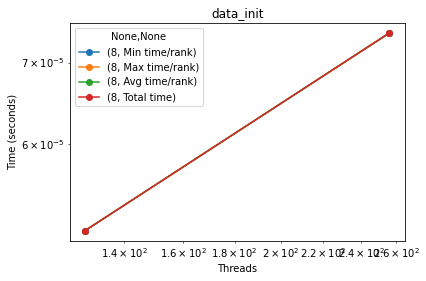

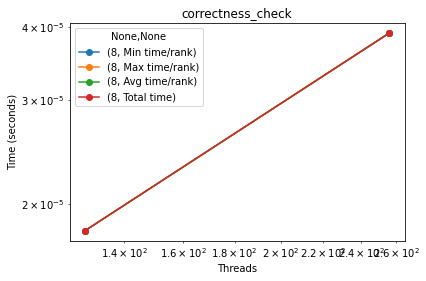

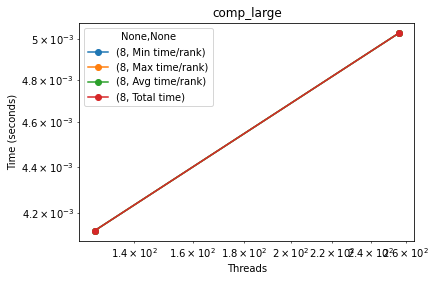

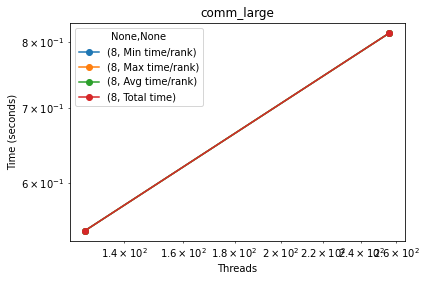

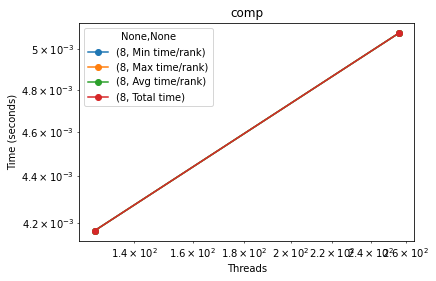

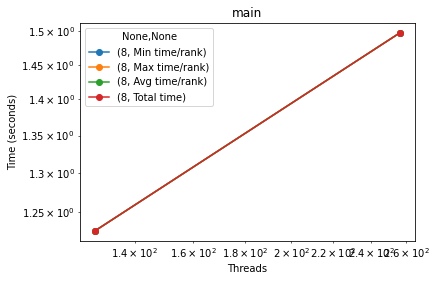

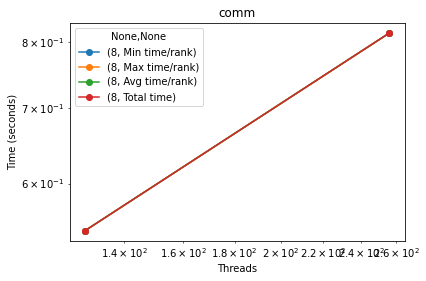

In [96]:
for name in function_names:
    plot_pandas(
        df=ctk2.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )